In [13]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os

In [ ]:
model = tf.keras.models.load_model('./efficientnet_b3.h5')

In [ ]:
for layer in model.layers:
    print(layer.output_shape)

In [7]:
dir = 'D:\CDIO\DS397\RealWaste'
data = tf.keras.utils.image_dataset_from_directory(dir,
                                                   label_mode='categorical',
                                                   image_size = (224,224))

Found 4249 files belonging to 8 classes.


In [9]:
train_size =  int(len(data)*0.7)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

print(train_size, val_size, test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

94 26 13


In [10]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(np.argmax(y,axis=1),yhat)

print('Precision: ', pre.result().numpy())
print('Recall: ', re.result().numpy())
print('Accuracy: ', acc.result().numpy())

1/1 [==============================] - 4s 4s/step
Precision:  0.94103193
Recall:  0.93643034
Accuracy:  0.93643034


In [11]:
batch0 = test.as_numpy_iterator().next()

In [12]:
from matplotlib import pyplot as plt

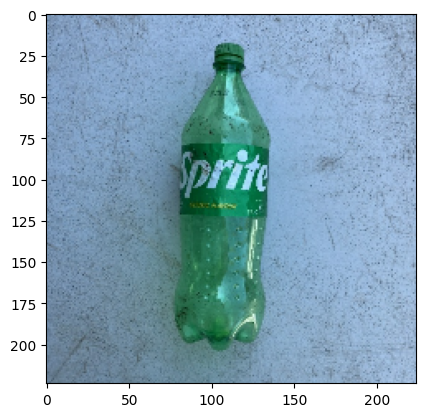

In [13]:
index = 1
img = batch0[0][index]
plt.imshow(img.astype('uint8'))

1/1 [==============================] - 0s 129ms/step
5


In [15]:
input_img = img.reshape(1,224,224,3)
yhat = model.predict(input_img)
print(np.argmax(yhat))

class_names = ['Cardboard', 'Organic', 'Glass', 'Metal', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
result = class_names[np.argmax(yhat)]
print(result)


1/1 [==============================] - 0s 97ms/step
5
Plastic


In [18]:
img = Image.open('D:\CDIO\DS397\RealWaste\Plastic\Plastic_920.jpg')
img = img.resize((224,224))
img = np.asarray(img)
print(img.shape)

(224, 224, 3)
